# Plot of transit per day of the week

Make a plot of transit vs. day of the week, based on data from the 20 busiest stations.

In [1]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

%matplotlib inline

## Step one 

* read in data
* Select only those rows with the busiest stations


In [2]:
path = '/Users/aleksandra/Desktop/output_data/Data/data_daily_weather.csv'
with open(path) as f:
    weather = pd.read_csv(f)

In [3]:
weather.head()

,Unnamed: 0,C/A,UNIT,SCP,STATION,UN_STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,EXITS,PREV_EXITS,SALDO_ENTRIES,SALDO_EXITS,TRANSITING,PRCP
0,0,A002,R051,02-00-00,59 ST,59ST456NQR,2016-06-27,5714706,06/26/2016,5714130.0,1938907,1938649.0,576.0,258.0,834.0,0.45
1,1,A002,R051,02-00-01,59 ST,59ST456NQR,2016-06-27,5258231,06/26/2016,5257426.0,1153431,1153236.0,805.0,195.0,1000.0,0.45
2,2,A002,R051,02-03-00,59 ST,59ST456NQR,2016-06-27,724086,06/26/2016,723741.0,2733057,2731725.0,345.0,1332.0,1677.0,0.45
3,3,A002,R051,02-03-01,59 ST,59ST456NQR,2016-06-27,5247019,06/26/2016,5246055.0,8295526,8294063.0,964.0,1463.0,2427.0,0.45
4,4,A002,R051,02-03-02,59 ST,59ST456NQR,2016-06-27,4955367,06/26/2016,4954510.0,6859058,6857968.0,857.0,1090.0,1947.0,0.45


Select only the relevant columns.

In [4]:
df = weather[['STATION', 'UN_STATION', 'DATE', 'TRANSITING']]
df.head()

,STATION,UN_STATION,DATE,TRANSITING
0,59 ST,59ST456NQR,2016-06-27,834.0
1,59 ST,59ST456NQR,2016-06-27,1000.0
2,59 ST,59ST456NQR,2016-06-27,1677.0
3,59 ST,59ST456NQR,2016-06-27,2427.0
4,59 ST,59ST456NQR,2016-06-27,1947.0


Select 20 busiest stations.

In [5]:
transit_station = df.groupby('UN_STATION', as_index=False).sum()
df_busiest_stations = transit_station.sort_values('TRANSITING', ascending=False).head(20)

In [6]:
df_busiest_stations.head()

,UN_STATION,TRANSITING
300,GRDCNTRL42ST4567S,20580477.0
83,34STHERALDSQBDFMNQR,16952616.0
435,TIMESSQ42ST1237ACENQRS,14461685.0
29,14STUNIONSQ456LNQR,14398597.0
291,FULTONST2345ACJZ,11495271.0


This df does not have the 'STATION' or the 'DATE' column anymore.

Take 'UN_STATION' series and select rows from df based on this series.

In [7]:
busiest_stations = df_busiest_stations.UN_STATION

busy_df = pd.DataFrame()

for station in busiest_stations:
    busy_df = busy_df.append(df.loc[df['UN_STATION'] == station])

In [8]:
busy_df.head()

,STATION,UN_STATION,DATE,TRANSITING
3299,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2946.0
3300,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2315.0
3301,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2238.0
3302,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,473.0
3303,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,488.0


## Step two
* Convert 'DATE' to datetime format.
* Extract day of the week from 'DATE' column.

In [9]:
busy_df['DATE'] = pd.to_datetime(busy_df['DATE'])

In [10]:
busy_df['DAY_OF_WEEK'] = busy_df['DATE'].dt.weekday_name

In [11]:
busy_df.head()

,STATION,UN_STATION,DATE,TRANSITING,DAY_OF_WEEK
3299,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2946.0,Monday
3300,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2315.0,Monday
3301,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2238.0,Monday
3302,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,473.0,Monday
3303,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,488.0,Monday


In [12]:
busy_df.tail()

,STATION,UN_STATION,DATE,TRANSITING,DAY_OF_WEEK
382018,14 ST,14ST123FLM,2016-09-23,1054.0,Friday
382019,14 ST,14ST123FLM,2016-09-23,811.0,Friday
382020,14 ST,14ST123FLM,2016-09-23,1133.0,Friday
382021,14 ST,14ST123FLM,2016-09-23,2338.0,Friday
382022,14 ST,14ST123FLM,2016-09-23,1931.0,Friday


Add a column that has a number for each weekday, this will permit us to sort the columns in the plot.

In [13]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
busy_df['WD_NUM'] = busy_df['DAY_OF_WEEK'].map(mapping)

In [14]:
busy_df.head()

,STATION,UN_STATION,DATE,TRANSITING,DAY_OF_WEEK,WD_NUM
3299,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2946.0,Monday,0
3300,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2315.0,Monday,0
3301,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,2238.0,Monday,0
3302,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,473.0,Monday,0
3303,GRD CNTRL-42 ST,GRDCNTRL42ST4567S,2016-06-27,488.0,Monday,0


In [25]:
per_day = busy_df.groupby('WD_NUM', as_index=True).sum()

Add a columns with weekdays in string format to be used as x-ticks in the plot.

In [27]:
per_day['DAY_OF_WEEK'] = weekdays

In [28]:
per_day

,TRANSITING,DAY_OF_WEEK
WD_NUM,,
0,14925948.0,Monday
1,29349287.0,Tuesday
2,33320081.0,Wednesday
3,33975271.0,Thursday
4,34008691.0,Friday
5,29883198.0,Saturday
6,16759165.0,Sunday


In [42]:
per_day.TRANSITING.max()

34008691.0

## Step three

__The plot__

* Barplot visualizes the fluctuation in transit straightforwardly.
* Legend not necessary, there is only one variable.
* rotate ticks for readability.
* add labels for both axes and a title

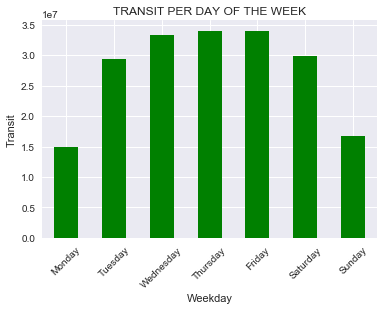

In [56]:
plt.figure(figsize=(10,3))
pl = per_day.plot(x = 'DAY_OF_WEEK', y= 'TRANSITING', kind='bar'
                  , legend=False, title = 'TRANSIT PER DAY OF THE WEEK', rot=45, fontsize=10, colormap = 'ocean')
pl.set_xlabel('Weekday')
pl.set_ylabel('Transit')

In [57]:
fig = pl.get_figure()
fig.savefig('Data/plot_transit_dow.pdf', bbox_inches="tight")